**任务:**
基于task2_data.csv数据，建立多因子线性回归模型，与只使用面积单因子进行建模预测的结果进行对比
1、以面积为输入变量，建立单因子模型，评估模型表现，可视化线性回归预测结果
2、以面积、人均收入、房龄为输入变量，建立多因子模型，评估模型表现
3、预测面积=150, 人均收入=60000, 房龄=5的合理房价

In [20]:
#数据加载
import pandas as pd
import numpy as np
data=pd.read_csv('./task2_data.csv')
data.head()

,面积,人均收入,房龄,房价
0,181,76419,5,1057731
1,171,82249,4,1516679
2,226,61417,5,1021442
3,157,68230,3,1439532
4,147,60851,6,595927


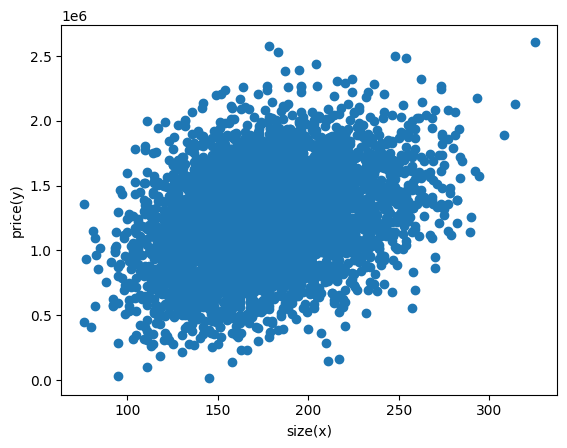

In [21]:
#xy 赋值
x=data.loc[:,'面积']
y=data.loc[:,'房价']
#数据可视化
from matplotlib import pyplot as plt
fig1=plt.figure()
plt.scatter(x,y)
plt.xlabel('size(x)')
plt.ylabel('price(y)')
plt.show()

In [22]:
#数据格式化
x=np.array(x)
y=np.array(y)
print(type(x),type(y))
print(x.shape,y.shape)

x=x.reshape(-1,1)
y=y.reshape(-1,1)
print(x.shape,y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(5000,) (5000,)
(5000, 1) (5000, 1)


In [23]:
# 创建模型实例
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#模型训练
model.fit(x,y)

LinearRegression()

In [24]:
#获取线性回归系数
a=model.coef_
b=model.intercept_
print(a,b,"y=f(x)={}*x+{}".format(a[0][0],b[0]))


[[3392.85613657]] [636436.84951755] y=f(x)=3392.85613657446*x+636436.8495175495


In [25]:
#结果预测
y_predict=a[0][0]*x+b[0]
print(y_predict)

[[1250543.81023753]
 [1216615.24887178]
 [1403222.33638338]
 ...
 [1091079.57181853]
 [1230186.67341808]
 [1158936.69455002]]


In [26]:
#第二种预测方法
y_predict2=model.predict(x)
print(y_predict2)

[[1250543.81023753]
 [1216615.24887178]
 [1403222.33638338]
 ...
 [1091079.57181853]
 [1230186.67341808]
 [1158936.69455002]]


In [27]:
#预测面积为150时，对应的价格
X_test=np.array([[150]])
y_test_p=model.predict(X_test)
print(y_test_p)

[[1145365.27000372]]


In [28]:
#模型评估
from sklearn.metrics import r2_score
R2=r2_score(y,y_predict)
print(R2)

0.1134461312323981


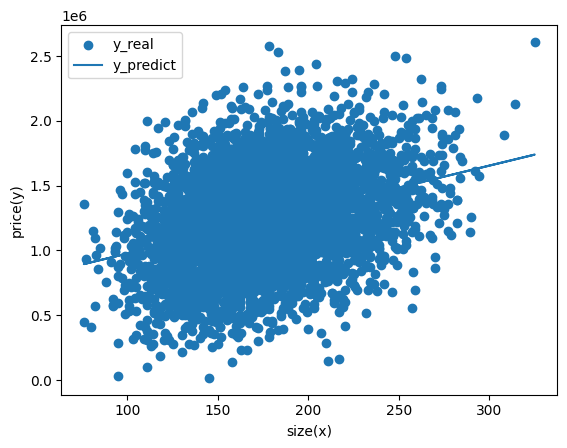

In [29]:
#预测结果可视化
from matplotlib import pyplot as plt
fig1=plt.figure()
plt.scatter(x,y,label='y_real')
plt.plot(x,y_predict,label='y_predict')
plt.xlabel('size(x)')
plt.ylabel('price(y)')
plt.legend()
plt.show()

In [30]:
print(data)

       面积   人均收入  房龄       房价
0     181  76419   5  1057731
1     171  82249   4  1516679
2     226  61417   5  1021442
3     157  68230   3  1439532
4     147  60851   6   595927
...   ...    ...  ..      ...
4995  165  58775   3   996310
4996  153  85274   4  1578724
4997  134  62065   3   898013
4998  175  69825   5  1195784
4999  154  65904   5  1256700

[5000 rows x 4 columns]


In [31]:
#数据加载
X=data.drop(['房价'],axis=1)
print(X)

       面积   人均收入  房龄
0     181  76419   5
1     171  82249   4
2     226  61417   5
3     157  68230   3
4     147  60851   6
...   ...    ...  ..
4995  165  58775   3
4996  153  85274   4
4997  134  62065   3
4998  175  69825   5
4999  154  65904   5

[5000 rows x 3 columns]


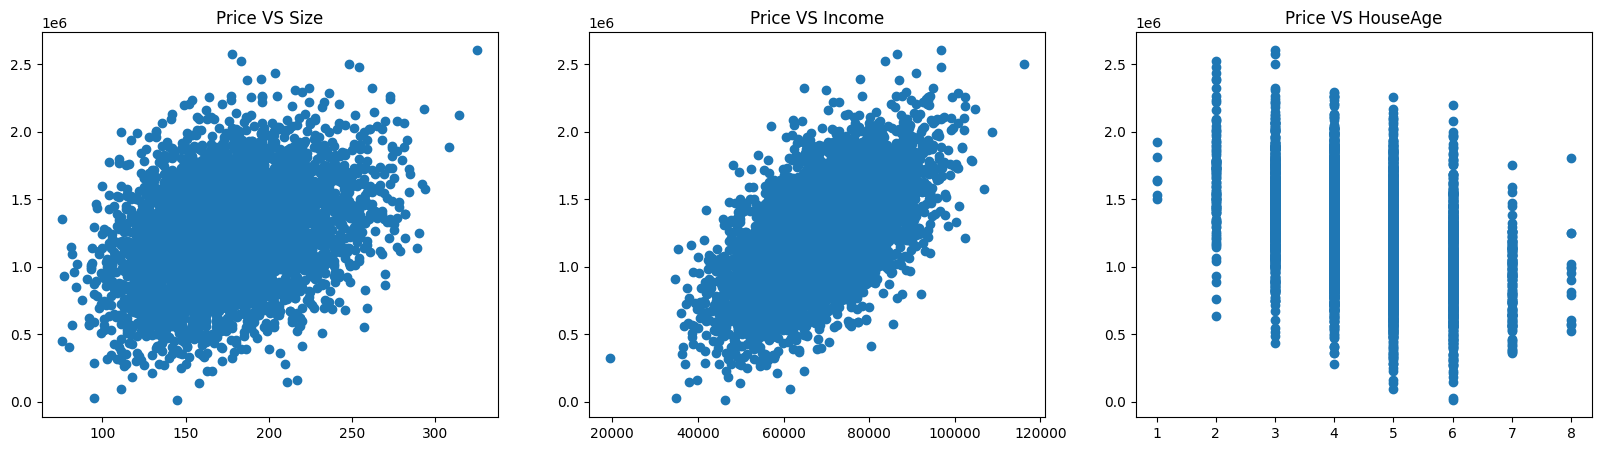

In [32]:
#数据可视化
from matplotlib import pyplot as plt
fig4=plt.figure(figsize=(20,5))
fig5=plt.subplot(131)
plt.scatter(X.loc[:,'面积'],y)
plt.title('Price VS Size')

fig6=plt.subplot(132)
plt.scatter(X.loc[:,'人均收入'],y)
plt.title('Price VS Income')

fig7=plt.subplot(133)
plt.scatter(X.loc[:,'房龄'],y)
plt.title('Price VS HouseAge')
plt.show()

In [33]:
X=np.array(X)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(5000, 3)


In [34]:
from sklearn.linear_model import LinearRegression
model_multi=LinearRegression()
print(model_multi)

LinearRegression()


In [35]:
model_multi.fit(X,y)


LinearRegression()

In [36]:
#模型预测
y_predict_multi=model_multi.predict(X)
print(y_predict_multi)

[[1321876.22458655]
 [1532829.66756216]
 [1133729.65269247]
 ...
 [1238881.0066627 ]
 [1195329.64589677]
 [1090430.44649661]]


In [37]:
#模型评估
from sklearn.metrics import r2_score
R2_multi=r2_score(y,y_predict_multi)
print(R2_multi)

0.547290690750997


In [38]:
#预测面积=150, 人均收入=60000, 房龄=5的合理房价
X_test=np.array([[150,60000,5]])
y_test_predict2=model_multi.predict(X_test)
print(y_test_predict2)

[[979459.69001603]]


线性回归房价实战summary：
1、通过搭建线性回归模型，实现单因子的房屋价格预测；
2、在单因子模型效果不好的情况下，通过考虑更多的因子，建立了多因子模型；
3、多因子模型达到了更好的预测效果，r2分数从单因子的0.1提高到了0.55；